In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Chargement des données
df_normal = pd.read_csv('/normal.csv')
df_anomal = pd.read_csv('/anormal.csv')

# 2. Étiquetage des données

df_normal['label'] = 0
df_anomal['label'] = 1

# 3. Fusion des deux datasets
df = pd.concat([df_normal, df_anomal], ignore_index=True)

# 4. Prétraitement et Nettoyage
df = df.drop(['No.', 'Info', 'Time'], axis=1)

print("Aperçu des données combinées :")
print(df.head())
print(df)

Aperçu des données combinées :
                     Source               Destination Protocol  Length  label
0  fe80::e518:bba6:bfc:14bd  fe80::ffd:3429:5144:68f0  UDP/XML    1300      0
1  fe80::ffd:3429:5144:68f0  fe80::e518:bba6:bfc:14bd   ICMPv6    1294      0
2  fe80::e518:bba6:bfc:14bd  fe80::ffd:3429:5144:68f0  UDP/XML    1300      0
3  fe80::ffd:3429:5144:68f0  fe80::e518:bba6:bfc:14bd   ICMPv6    1294      0
4           192.168.194.129           192.168.194.130  UDP/XML    1269      0
                         Source               Destination Protocol  Length  \
0      fe80::e518:bba6:bfc:14bd  fe80::ffd:3429:5144:68f0  UDP/XML    1300   
1      fe80::ffd:3429:5144:68f0  fe80::e518:bba6:bfc:14bd   ICMPv6    1294   
2      fe80::e518:bba6:bfc:14bd  fe80::ffd:3429:5144:68f0  UDP/XML    1300   
3      fe80::ffd:3429:5144:68f0  fe80::e518:bba6:bfc:14bd   ICMPv6    1294   
4               192.168.194.129           192.168.194.130  UDP/XML    1269   
...                         ...  


Entraînement du modèle en cours...

--- Rapport de Classification ---
              precision    recall  f1-score   support

      Normal       0.90      0.99      0.95       721
     Anormal       1.00      0.94      0.97      1288

    accuracy                           0.96      2009
   macro avg       0.95      0.97      0.96      2009
weighted avg       0.96      0.96      0.96      2009



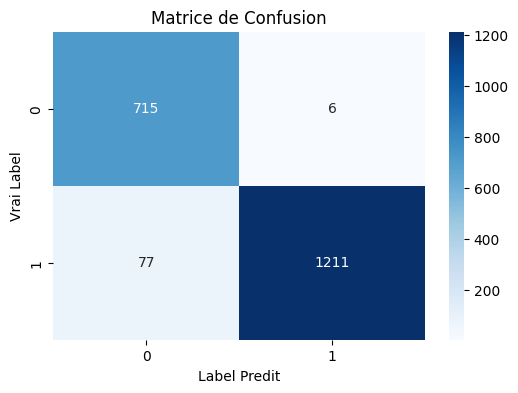


Importance des caractéristiques :
       feature  importance
1  Destination    0.403057
0       Source    0.337855
3       Length    0.173778
2     Protocol    0.085310


In [17]:


# 5. Encodage des variables catégoriques (Source, Destination, Protocol)
le_proto = LabelEncoder()
le_ip = LabelEncoder()

# On convertit en string pour éviter les erreurs si des nombres sont mélangés
df['Protocol'] = le_proto.fit_transform(df['Protocol'].astype(str))

# Pour les IP, on combine Source et Destination pour l'encodeur afin qu'il connaisse toutes les IPs possibles
all_ips = pd.concat([df['Source'], df['Destination']]).astype(str).unique()
le_ip.fit(all_ips)

df['Source'] = le_ip.transform(df['Source'].astype(str))
df['Destination'] = le_ip.transform(df['Destination'].astype(str))

# 6. Séparation Features (X) et Target (y)
X = df.drop('label', axis=1)
y = df['label']

# 7. Division en données d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Entraînement du modèle (Random Forest)
print("\nEntraînement du modèle en cours...")
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 9. Évaluation
y_pred = clf.predict(X_test)

print("\n--- Rapport de Classification ---")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Anormal']))

# Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion')
plt.ylabel('Vrai Label')
plt.xlabel('Label Predit')
plt.show()

# 10. Voir l'importance des features
importances = pd.DataFrame({'feature': X.columns, 'importance': clf.feature_importances_})
print("\nImportance des caractéristiques :")
print(importances.sort_values('importance', ascending=False))